# Markov Chains and Applications using Python

## Simulation Methods

#### Exercise

1. Write the code to produce simulations of the  5 state Markov chain with transition matrix 
$$P = 
\left( \begin{matrix} 0& \frac{1}{3} & \frac{2}{3} & 0&0 \\
\frac{1}{4} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8}&\frac{3}{8} \\
\frac{1}{2} & 0 & 0& \frac{1}{4}&\frac{1}{4}\\
0&1&0&0&0 \\
1&0&0&0&0
\end{matrix} \right),$$
starting in state 1.


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:

# Initial state of the Markov Chain
X = [1]  # starting state

# Number of steps to simulate
n = 10

# Transition probability matrix P
P = np.array([
    [0, 1/3, 2/3, 0, 0],
    [1/4, 1/8, 1/8, 1/8, 3/8],
    [1/2, 0, 0, 1/4, 1/4],
    [0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0]
])

# Simulate the Markov Chain
for i in range(n):
    p = P[X[-1] - 1, :]  # Calculate the p values
    next_state = np.random.choice(np.arange(1, 6), p=p)  # Update the chain
    X.append(next_state)

# Print the resulting chain
print(X)




[1, 2, 3, 4, 2, 5, 1, 3, 4, 2, 1]


## Estimating Hitting Probabilities and Times

#### Exercises

Consider a Markov chain on 4 states with transition matrix
$$P = \left( \begin{matrix} \frac{1}{2}& \frac{1}{4} & \frac{1}{4}& 0 \\
\frac{1}{3} & 0 & \frac{2}{3} & 0 \\
0&\frac{7}{8} & 0 & \frac{1}{8} \\
0&\frac{1}{2}& \frac{1}{4} & \frac{1}{4}
\end{matrix} \right). $$

1.  Edit the previous code to simulate this chain starting at initial state 2. 

In [0]:


X = [-2]  # initial state of the Markov Chain
n = 10  # number of steps to simulate
P = np.array([[1/2, 1/4, 1/4, 0],
              [1/3, 0, 2/3, 0],
              [0, 7/8, 0, 1/8],
              [0, 1/2, 1/4, 1/4]])

for i in range(n):
    p = P[X[-1], :]  # Calculate the p values
    next_state = np.random.choice(range(4), size=1, p=p)  # sample the next state based on probabilities
    X.append(next_state[0])  # update the chain

print(X)


[-2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1]


2. By editing the code produce an  estimate  of the probability of hitting state 1 before state 4 after starting in state 2. 

HINT: In this exercise, apply the same constructs as above:  `while` loops, `if`-`else` statements and function definitions

In [0]:


trials = 1000
hit_one = 0  # Counter for number of times state 1 is hit before state 4

for j in range(trials):
    X = [2]  # initial state of the Markov Chain
    P = np.array([[1/2, 1/4, 1/4, 0],
                  [1/3, 0, 2/3, 0],
                  [0, 7/8, 0, 1/8],
                  [0, 1/2, 1/4, 1/4]])  # P matrix
    i = 0  # Number of steps
    while 1 < X[i] < 4:
        p = P[X[i]-1, :]  # Calculate the p values (adjust index to 0-based)
        next_state = np.random.choice(range(1, 5), size=1, p=p)  # sample the next state based on probabilities
        X.append(next_state[0])  # update the chain
        i += 1
    if X[i] == 1:
        hit_one += 1

probest = hit_one / trials
print("Probability of hitting state 1 before state 4:", probest)


Probability of hitting state 1 before state 4: 0.799


We then find an estimate of (will change slightly each time the above code is run):

3. Compare the previous estimate to the calculated value of the hitting probability.


To find the hitting probability we need to solve the equations
$$\alpha_i = P_{i,j} \alpha_j,$$
with $\alpha_1=1$ and $\alpha_4=0$. Here the equations are
$$\alpha_2 = \frac{1}{3} \alpha_1 + \frac{2}{3} \alpha_3 = \frac{1}{3} +\frac{2}{3} \alpha_3 ,$$
$$\alpha_3= \frac{7}{8} \alpha_2 +\frac{1}{8} \alpha_4 =\frac{7}{8} \alpha_2.$$


4. Repeat the above exercises starting at state 3 instead of state 2.

In [0]:


trials = 1000
hit_one = 0  # Counter for number of times state 1 is hit before state 4

for j in range(trials):
    X = [3]  # initial state of the Markov Chain
    P = np.array([[1/2, 1/4, 1/4, 0],
                  [1/3, 0, 2/3, 0],
                  [0, 7/8, 0, 1/8],
                  [0, 1/2, 1/4, 1/4]])  # P matrix
    i = 0  # Number of steps
    while 1 < X[i] < 4:
        p = P[X[i]-1, :]  # Calculate the p values (adjust index to 0-based)
        next_state = np.random.choice(range(1, 5), size=1, p=p)  # sample the next state based on probabilities
        X.append(next_state[0])  # update the chain
        i += 1
    if X[i] == 1:
        hit_one += 1

probest = hit_one / trials
print("Probability of hitting state 1 before state 4:", probest)


Probability of hitting state 1 before state 4: 0.676


We then find an estimate of $\alpha$ (will change slightly each time the above code is run):

5. Edit the code to estimate the mean time to hit the state 1 starting at state 2. Repeat this starting at states 3 and 4. Compare these to the exact calculations of the mean hitting time. 

Code for estimating time to hit state 1 starting at state 2:

In [0]:


trials = 1000
total_steps = 0  # Counter for the total number of steps taken

for j in range(trials):
    X = [2]  # initial state of the Markov Chain
    P = np.array([[1/2, 1/4, 1/4, 0],
                  [1/3, 0, 2/3, 0],
                  [0, 7/8, 0, 1/8],
                  [0, 1/2, 1/4, 1/4]])  # P matrix
    i = 0  # Number of steps
    while X[i] > 1:
        p = P[X[i]-1, :]  # Calculate the p values (adjust index to 0-based)
        next_state = np.random.choice(range(1, 5), size=1, p=p)  # sample the next state based on probabilities
        X.append(next_state[0])  # update the chain
        i += 1
    total_steps += (i - 1)

time_est = total_steps / trials
print("Average number of steps taken to reach state 1:", time_est)


Average number of steps taken to reach state 1: 4.319


Code for estimating time to hit state 1 starting at state 3:

In [0]:


# Number of trials
trials = 1000
# Counter for the total number of steps taken
totalsteps = 0

# Transition probability matrix
P = np.array([[1/2, 1/4, 1/4, 0],
              [1/3, 0, 2/3, 0],
              [0, 7/8, 0, 1/8],
              [0, 1/2, 1/4, 1/4]])

# Perform the trials
for j in range(trials):
    X = [3]  # initial state of the Markov Chain
    i = 1  # Number of steps
    while X[-1] > 1:
        p = P[X[-1] - 1]  # Calculate the p values (X is 1-indexed in R, but 0-indexed in Python)
        X.append(np.random.choice(range(1, 5), p=p))  # update the chain
        i += 1
    totalsteps += (i - 1)

# Calculate the estimated time
timeest = totalsteps / trials
print(timeest)


6.223


Code for estimating time to hit state 1 starting at state 4:

In [0]:


# Number of trials
trials = 1000
# Counter for the total number of steps taken
totalsteps = 0

# Transition probability matrix
P = np.array([[1/2, 1/4, 1/4, 0],
              [1/3, 0, 2/3, 0],
              [0, 7/8, 0, 1/8],
              [0, 1/2, 1/4, 1/4]])

# Perform the trials
for j in range(trials):
    X = [3]  # initial state of the Markov Chain (4th state, 0-indexed for Python)
    i = 1  # Number of steps
    while X[-1] > 1:
        p = P[X[-1] - 1]  # Calculate the p values (X is 1-indexed in R, but 0-indexed in Python)
        X.append(np.random.choice(range(1, 5), p=p))  # update the chain
        i += 1
    totalsteps += (i - 1)

# Calculate the estimated time
timeest = totalsteps / trials
print(timeest)


6.59


To find the expected time to hit state one we need to solve the equations

$$t_i = P_{i,j} t_j +1,$$

with the edge  condition that $t_1 =0.$

So here we have
$$t_2 = \frac{1}{3} t_1 + \frac{2}{3} t_3 +1= \frac{2}{3} t_3 +1,$$

$$t_3= \frac{7}{8} t_2 +\frac{1}{8} t_4 +1,$$

$$t_4 = \frac{1}{2} t_2 +\frac{1}{4} t_3+\frac{1}{4} t_4 +1.$$

Solving these gives

$$t_2 = \frac{125}{23}=5.43,$$

$$t_3= \frac{153}{23}=6.65,$$

$$t_4= \frac{165}{23}=7.17.$$

6. Produce a histogram of the hitting times of state 1 starting  at state 2 using 1000 simulations of the Markov chain. 

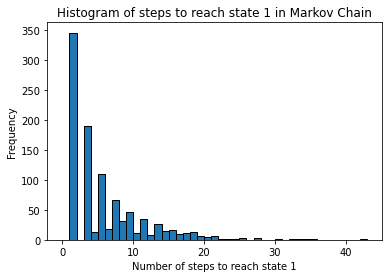

In [0]:


trials = 1000
results = []

# Define the transition matrix
P = np.array([
    [1/2, 1/4, 1/4, 0],
    [1/3, 0, 2/3, 0],
    [0, 7/8, 0, 1/8],
    [0, 1/2, 1/4, 1/4]
])

for j in range(trials):
    X = [2]  # initial state of the Markov Chain
    i = 0  # Number of steps
    
    while X[i] > 1:
        current_state = X[i]
        p = P[current_state - 1]  # Calculate the p values (adjust index for 0-based)
        next_state = np.random.choice([1, 2, 3, 4], p=p)
        X.append(next_state)  # update the chain
        i += 1
        
    results.append(i)

# Plot the histogram of the results
plt.hist(results, bins=range(max(results)+1), edgecolor='black')
plt.xlabel('Number of steps to reach state 1')
plt.ylabel('Frequency')
plt.title('Histogram of steps to reach state 1 in Markov Chain')
plt.show()


## Stationary and Limiting Distributions

### Exercises: Finite aperiodic chain with single closed class

Consider the Markov chain, $\{X_n\}_{n\geq0}$, on 5 states with transition matrix,
$$P = \left( \begin{matrix} \frac{1}{2}& \frac{1}{3}&\frac{1}{6}&0&0\\
\frac{1}{4}&0&\frac{1}{4}&\frac{1}{4}&\frac{1}{4}\\
0&0&\frac{1}{8}&\frac{1}{8}&\frac{3}{4}\\
\frac{1}{2}&\frac{1}{4}&\frac{1}{8}&\frac{1}{16}&\frac{1}{16}\\
1&0&0&0&0
\end{matrix} \right). $$

1. Find the associated stationary distribution (without using **R**).

2. Produce code to simulate this Markov chain and plot the proportion of simulations in each state against the number of steps for 1000 independent realisations of the Markov chain each starting at state 1. Repeat with each chain starting at state 3. Compare these plots to the stationary distribution and comment.

We first create a function called `simulate.chain` that we can reuse for future exercises:

In [0]:


def simulate_chain(trials, n, P, X0=1):
    m = P.shape[0]
    
    # Array to store the proportion of simulations in each state
    levels = np.zeros((m, n + 1))
    
    for j in range(trials):
        X = [X0]  # initial state of the Markov Chain
        levels[X[0] - 1, 0] += 1  # Record the initial state (adjust for 0-based indexing)
        
        for i in range(n):
            current_state = X[-1]
            p = P[current_state - 1]  # Get the p values (adjust for 0-based indexing)
            next_state = np.random.choice(range(1, m + 1), p=p)
            X.append(next_state)
            levels[next_state - 1, i + 1] += 1  # Update the chain (adjust for 0-based indexing)
    
    levels = levels / trials
    return levels

# Example usage
trials = 1000
n = 10
P = np.array([
    [1/2, 1/4, 1/4, 0],
    [1/3, 0, 2/3, 0],
    [0, 7/8, 0, 1/8],
    [0, 1/2, 1/4, 1/4]
])

levels = simulate_chain(trials, n, P, X0=1)
print(levels)


[[1.    0.49  0.334 0.257 0.248 0.25  0.265 0.263 0.243 0.238 0.246]
 [0.    0.265 0.346 0.356 0.38  0.368 0.362 0.377 0.366 0.371 0.383]
 [0.    0.245 0.292 0.339 0.311 0.326 0.316 0.304 0.345 0.336 0.314]
 [0.    0.    0.028 0.048 0.061 0.056 0.057 0.056 0.046 0.055 0.057]]


We now use the above function to simulate this particular Markov chain 1000 times starting in state 1:

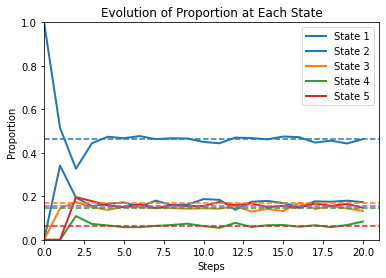

In [0]:


def simulate_chain(trials, n, P, X0=1):
    m = P.shape[0]
    
    # Array to store the proportion of simulations in each state
    levels = np.zeros((m, n + 1))
    
    for j in range(trials):
        X = [X0]  # initial state of the Markov Chain
        levels[X[0] - 1, 0] += 1  # Record the initial state (adjust for 0-based indexing)
        
        for i in range(n):
            current_state = X[-1]
            p = P[current_state - 1]  # Get the p values (adjust for 0-based indexing)
            next_state = np.random.choice(range(1, m + 1), p=p)
            X.append(next_state)
            levels[next_state - 1, i + 1] += 1  # Update the chain (adjust for 0-based indexing)
    
    levels = levels / trials
    return levels

# Parameters
m = 5
n = 20
P = np.array([
    [1/2, 1/3, 1/6, 0, 0],
    [1/4, 0, 1/4, 1/4, 1/4],
    [0, 0, 1/8, 1/8, 3/4],
    [1/2, 1/4, 1/8, 1/16, 1/16],
    [1, 0, 0, 0, 0]
])

# Simulate the chain
levels = simulate_chain(1000, n, P, X0=1)

# Plot the evolution of the proportion at each state
plt.plot(levels[0, :], label='State 1', color='C0', linewidth=2)
for i in range(1, m):
    plt.plot(levels[i, :], label=f'State {i+1}', linewidth=2)

plt.xlim(0, n + 1)
plt.ylim(0, 1)
plt.xlabel('Steps')
plt.ylabel('Proportion')
plt.legend(loc='upper right')

# Lines representing the stationary distribution
exact = [0.462, 0.170, 0.146, 0.065, 0.156]
for i in range(m):
    plt.axhline(y=exact[i], color=f'C{i}', linestyle='--')

plt.title('Evolution of Proportion at Each State')
plt.show()


Here is the code starting in state 3 instead:

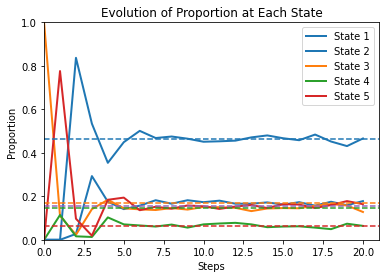

In [0]:


def simulate_chain(trials, n, P, X0=1):
    m = P.shape[0]
    
    # Array to store the proportion of simulations in each state
    levels = np.zeros((m, n + 1))
    
    for j in range(trials):
        X = [X0]  # initial state of the Markov Chain
        levels[X[0] - 1, 0] += 1  # Record the initial state (adjust for 0-based indexing)
        
        for i in range(n):
            current_state = X[-1]
            p = P[current_state - 1]  # Get the p values (adjust for 0-based indexing)
            next_state = np.random.choice(range(1, m + 1), p=p)
            X.append(next_state)
            levels[next_state - 1, i + 1] += 1  # Update the chain (adjust for 0-based indexing)
    
    levels = levels / trials
    return levels

# Parameters
m = 5
n = 20
P = np.array([
    [1/2, 1/3, 1/6, 0, 0],
    [1/4, 0, 1/4, 1/4, 1/4],
    [0, 0, 1/8, 1/8, 3/4],
    [1/2, 1/4, 1/8, 1/16, 1/16],
    [1, 0, 0, 0, 0]
])

# Simulate the chain with initial state 3
levels = simulate_chain(1000, n, P, X0=3)

# Plot the evolution of the proportion at each state
plt.plot(levels[0, :], label='State 1', color='C0', linewidth=2)
for i in range(1, m):
    plt.plot(levels[i, :], label=f'State {i+1}', linewidth=2)

plt.xlim(0, n + 1)
plt.ylim(0, 1)
plt.xlabel('Steps')
plt.ylabel('Proportion')
plt.legend(loc='upper right')

# Lines representing the stationary distribution
exact = [0.462, 0.170, 0.146, 0.065, 0.156]
for i in range(m):
    plt.axhline(y=exact[i], color=f'C{i}', linestyle='--')

plt.title('Evolution of Proportion at Each State')
plt.show()




It does not matter which state the Markov chain starts in it  quickly converges to the stationary distribution calculated in the first question. We see that even by step 7  the stationary distribution is a good approximation. 

### Exercises: Infinite recurrent aperiodic chain with a single closed class

1. Rewrite the code for simulating a simple random walk from the previous worksheet to include the reflecting boundary at 0. 

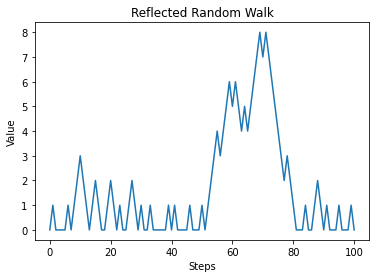

In [0]:

def refl_random_walk(n, a=0):
    a = 0  # initial level
    S = [a]  # initialize the random walk
    p = 0.55  # probability of -1
    
    for i in range(n):
        y = np.random.uniform()
        if y > p:
            x = 1
        else:
            if S[i] > 0:  # Test whether we are at the boundary or not
                x = -1  # Not at boundary so normal step
            else:
                x = 0  # At boundary so no change
        
        S.append(S[i] + x)  # update the random walk
    
    return S

n = 100
S = refl_random_walk(n)
plt.plot(range(n + 1), S, linestyle='-')  # corrected parameter name
plt.xlabel('Steps')
plt.ylabel('Value')
plt.title('Reflected Random Walk')
plt.show()

 

              

2. Calculate the stationary distribution.

To find the stationary distribution we need to solve the questions:

\begin{align*}
\pi_0 &= 0.55 \pi_0 + 0.55 \pi_1 \\
\pi_i & = 0.45 \pi_{i-1} + 0.55 \pi_{i+1} \; \textrm{ for all }i>0\\
\sum_{i =0}^\infty \pi_i &= 1
\end{align*}

Solving the first two equations we obtain

$$\pi_i = \left( \frac{9}{11} \right)^i \pi_0,$$

which we substitute into the third equation to obtain

$$\pi_0 \sum_{i =0}^\infty \left( \frac{9}{11}\right)^i = 1.$$

Solving this gives the stationary distribution as

$$ \pi_i = \left( \frac{9}{11}\right)^i \left( \frac{2}{11} \right).$$

We will add this to the histogram in the next exercise.

3. Simulate this process for 200 steps. Using 1000 independent simulations produce a histogram of $S_{200}$. 

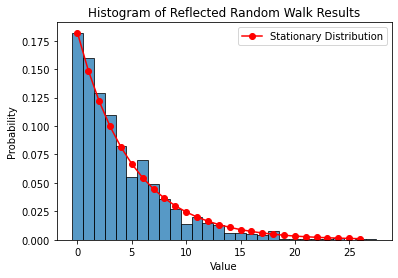

In [0]:

def refl_random_walk(n, a=0):
    a = 0  # initial level
    S = [a]  # initialize the random walk
    p = 0.55  # probability of -1
    
    for i in range(n):
        y = np.random.uniform()
        if y > p:
            x = 1
        else:
            if S[i] > 0:  # Test whether we are at the boundary or not
                x = -1  # Not at boundary so normal step
            else:
                x = 0  # At boundary so no change
        
        S.append(S[i] + x)  # update the random walk
    
    return S

# Parameters
trials = 1000
n = 200
results = []

# Simulate the reflected random walk for the given number of trials
for j in range(trials):
    S = refl_random_walk(n)
    results.append(S[n])

# Plot the histogram of the results
max_result = max(results)
bins = np.arange(-0.5, max_result + 1.5, 1)  # Bin edges so there is one integer in each bin
plt.hist(results, bins=bins, density=True, edgecolor='black', alpha=0.75)

# Add the stationary distribution
x = np.arange(0, 27)
stationary_dist = (2 / 11) * (9 / 11) ** x
plt.plot(x, stationary_dist, linestyle='-', marker='o', color='red', label='Stationary Distribution')

plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Histogram of Reflected Random Walk Results')
plt.legend()
plt.show()


We see from the histogram that the stationary distribution and the empirical distribution are close. This is to be  expected as the Markov chain converges to its stationary distribution, since the chain is positive recurrent and aperiodic.  

### Exercises: Periodic chain

Let $\{X_n\}_{n\geq0}$ be a Markov chain on 6 states with transition matrix,
$$P= \left( \begin{matrix} 0&0&0&\frac{1}{2}&0&\frac{1}{2}\\
 \frac{1}{2}&0&0&0&\frac{1}{2}&0\\
  \frac{1}{2}&0&0&0&\frac{1}{2}&0\\
   0&\frac{1}{2}&\frac{1}{2}&0&0&0\\
  0&0&0&\frac{1}{2}&0&\frac{1}{2}\\
 0&\frac{1}{2}&\frac{1}{2}&0&0&0
 \end{matrix} \right) $$

1. Calculate the associated stationary distribution. 

We solve $$\pi = \pi P$$ 

with the additional condition $\sum \pi_i = 1$ and find the stationary distribution is 

 $$\pi = \left( \frac{1}{6}, \frac{1}{6}, \frac{1}{6}, \frac{1}{6}, \frac{1}{6},\frac{1}{6} \right).$$

2. Simulate the Markov chain with initial state 1. As for the first exercise produce a plot of the proportion of simulations in each state for the first 20 steps. Compare this to the stationary distribution and comment. 

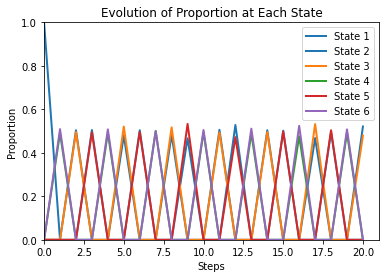

In [0]:


def simulate_chain(trials, n, P, X0=1):
    m = P.shape[0]
    
    # Array to store the proportion of simulations in each state
    levels = np.zeros((m, n + 1))
    
    for j in range(trials):
        X = [X0]  # initial state of the Markov Chain
        levels[X[0] - 1, 0] += 1  # Record the initial state (adjust for 0-based indexing)
        
        for i in range(n):
            current_state = X[-1]
            p = P[current_state - 1]  # Get the p values (adjust for 0-based indexing)
            next_state = np.random.choice(range(1, m + 1), p=p)
            X.append(next_state)
            levels[next_state - 1, i + 1] += 1  # Update the chain (adjust for 0-based indexing)
    
    levels = levels / trials
    return levels

# Parameters
m = 6
n = 20
P = np.array([
    [0, 0, 0, 1/2, 0, 1/2],
    [1/2, 0, 0, 0, 1/2, 0],
    [1/2, 0, 0, 0, 1/2, 0],
    [0, 1/2, 1/2, 0, 0, 0],
    [0, 0, 0, 1/2, 0, 1/2],
    [0, 1/2, 1/2, 0, 0, 0]
])

# Simulate the chain with initial state 1
levels = simulate_chain(1000, n, P, X0=1)

# Plot the evolution of the proportion at each state
plt.plot(levels[0, :], label='State 1', color='C0', linewidth=2)
for i in range(1, m):
    plt.plot(levels[i, :], label=f'State {i+1}', linewidth=2)

plt.xlim(0, n + 1)
plt.ylim(0, 1)
plt.xlabel('Steps')
plt.ylabel('Proportion')
plt.legend(loc='upper right')

plt.title('Evolution of Proportion at Each State')
plt.show()


It is clear from the plot that in this case the Markov chain does not converge to the stationary distribution. This occurs since the Markov chain is periodic. It can be seen either from the plot produced or by examining the structure of the transition matrix that the chain has period 3.
 
We can separate the state space into 3 disjoint sets,

 $$S_1 = \{1,5\}, \; S_2 = \{4,6\},\;  S_3 =\{2,3\} $$
 
such that, for any $i = 1,2,3$ and for any $x \in S_i$,

 $$\mathbb{P} (X_1 \in S_{i+1} | X_0 = x) = 1,$$

where $S_4= S_1$. This proves the chain has period 3.  

### Exercises: Multiple closed classes

We now consider a Markov chain with two closed classes and one open class. Here $\{X_n\}_{n\geq0}$ has 5 states with transition matrix

 $$P= \left(\begin{matrix} \frac{2}{3}& 0 &0& \frac{1}{3}& 0 \\
0& 1 &0&0& 0 \\
\frac{1}{4}& \frac{1}{4} &0&\frac{1}{4}& \frac{1}{4} \\
\frac{1}{8}& 0 &0&\frac{7}{8}& 0 \\
0& \frac{3}{8}&\frac{1}{4}&\frac{1}{4}& \frac{1}{8}
\end{matrix} \right).
 $$ 

1. Identify all the closed and open classes in this Markov chain. 

|Class       |Type                |
|:----------:|:------------------:|
|{1,4}       |closed              |
|{2}         |closed (absorbing)  |
|{3,5}       |open                |

2. Produce a plot for each starting state of the evolution of the proportion of simulations in each state over time. 

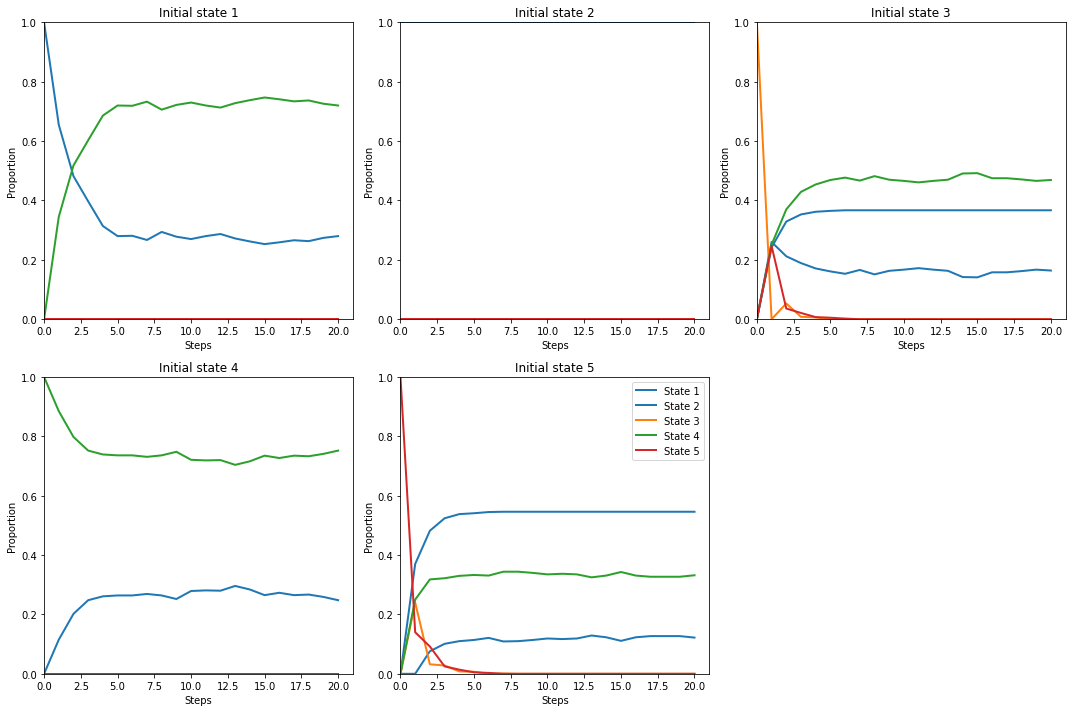

In [0]:

def simulate_chain(trials, n, P, X0=1):
    m = P.shape[0]
    
    # Array to store the proportion of simulations in each state
    levels = np.zeros((m, n + 1))
    
    for j in range(trials):
        X = [X0]  # initial state of the Markov Chain
        levels[X[0] - 1, 0] += 1  # Record the initial state (adjust for 0-based indexing)
        
        for i in range(n):
            current_state = X[-1]
            p = P[current_state - 1]  # Get the p values (adjust for 0-based indexing)
            next_state = np.random.choice(range(1, m + 1), p=p)
            X.append(next_state)
            levels[next_state - 1, i + 1] += 1  # Update the chain (adjust for 0-based indexing)
    
    levels = levels / trials
    return levels

# Parameters
m = 5
n = 20
P = np.array([
    [2/3, 0, 0, 1/3, 0],
    [0, 1, 0, 0, 0],
    [1/4, 1/4, 0, 1/4, 1/4],
    [1/8, 0, 0, 7/8, 0],
    [0, 3/8, 1/4, 1/4, 1/8]
])

labels = [f'State {i+1}' for i in range(m)]

# Plot setup to have 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for initial_state in range(1, 6):
    levels = simulate_chain(1000, n, P, X0=initial_state)
    
    ax = axs[initial_state - 1]
    ax.plot(levels[0, :], label='State 1', color='C0', linewidth=2)
    for i in range(1, m):
        ax.plot(levels[i, :], label=f'State {i+1}', linewidth=2)
    
    ax.set_xlim(0, n + 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Steps')
    ax.set_ylabel('Proportion')
    ax.set_title(f'Initial state {initial_state}')
    if initial_state == 5:
        ax.legend(labels, loc='upper right')

# Hide the sixth subplot (bottom right)
fig.delaxes(axs[5])

plt.tight_layout()
plt.show()


Note that the limit distribution now depends to the initial state. 